In [4]:
import numpy as np
import pandas as pd
import os as os
os.chdir('C:\\Users\\skv\\Downloads\\drive-download-20210216T050040Z-001')

In [27]:
df_cust=pd.read_csv('customer.csv')

In [28]:
df_cust.head(2)

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex
0,CUSTID1,15000,18,44,0
1,CUSTID2,15000,18,79,0


In [29]:
df_cust.Sex=df_cust.Sex.astype('object')

In [30]:
df_cust.dtypes

Cust_Number         object
Yearly_Income        int64
Age                  int64
Cust_Spend_Score     int64
Sex                 object
dtype: object

In [31]:
df_cust.drop(columns=['Cust_Number'],axis=1,inplace=True)

In [32]:
df_cust.shape

(200, 4)

In [33]:
df_cust.dtypes

Yearly_Income        int64
Age                  int64
Cust_Spend_Score     int64
Sex                 object
dtype: object

In [34]:
Q1=df_cust.quantile(0.25)

In [35]:
Q3=df_cust.quantile(0.75)

In [36]:
IQR=Q3-Q1

In [37]:
head=df_cust<(Q1-15*IQR)

In [38]:
tail=df_cust>(Q3+1.5*IQR)

In [39]:
df_cust=df_cust[~(head|tail).any(axis=1)]

In [40]:
df_cust.reset_index(drop=True,inplace=True)

In [41]:
df_cust.shape

(198, 4)

In [42]:
df_cust.head(2)

,Yearly_Income,Age,Cust_Spend_Score,Sex
0,15000,18,44,0
1,15000,18,79,0


In [43]:
X_filtered = df_cust[['Cust_Spend_Score', 'Yearly_Income']]

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
X_norm=StandardScaler()

In [46]:
num_norm=X_norm.fit_transform(X_filtered)

In [47]:
X=pd.DataFrame(num_norm,columns=X_filtered.columns)
X.head()

,Cust_Spend_Score,Yearly_Income
0,-0.283684,-1.779171
1,1.068399,-1.779171
2,-1.674398,-1.739447
3,1.068399,-1.739447
4,-0.399577,-1.699723


In [54]:
import seaborn as sns

<AxesSubplot:xlabel='Cust_Spend_Score', ylabel='Yearly_Income'>

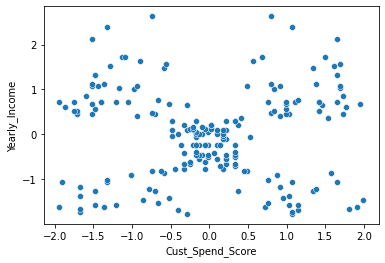

In [55]:
sns.scatterplot(x=X.Cust_Spend_Score,y=X.Yearly_Income)

In [56]:
from sklearn.cluster import KMeans

In [58]:
wcss=[]
for i in range(1,21):
    Kmeans=KMeans(n_clusters=i,random_state=10)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)

<AxesSubplot:>

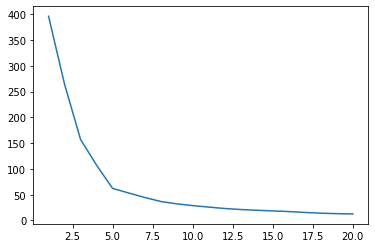

In [59]:
sns.lineplot(x=range(1,21),y=wcss)

now checking on sihoutte score

In [60]:
from sklearn.metrics import silhouette_score,silhouette_samples

In [68]:
# create a list for different values of K
n_clusters = [2, 3, 4, 5, 6]

# use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
silscore=[]
for K in range(2,21):
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(X)
    score = silhouette_score(X, predict, random_state= 10)
    silscore.append(score)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.30326001084082965)
For 3 clusters the silhouette score is 0.464085451156394)
For 4 clusters the silhouette score is 0.49703262971863627)
For 5 clusters the silhouette score is 0.5582289588979077)
For 6 clusters the silhouette score is 0.5424905196078039)
For 7 clusters the silhouette score is 0.5269930711535271)
For 8 clusters the silhouette score is 0.45543289610526966)
For 9 clusters the silhouette score is 0.44866207864911595)
For 10 clusters the silhouette score is 0.4455163747564949)
For 11 clusters the silhouette score is 0.4359876191891642)
For 12 clusters the silhouette score is 0.42641305637483284)
For 13 clusters the silhouette score is 0.4122733374429743)
For 14 clusters the silhouette score is 0.4145556334474977)
For 15 clusters the silhouette score is 0.4147647541989087)
For 16 clusters the silhouette score is 0.4159636342410482)
For 17 clusters the silhouette score is 0.4246838668444865)
For 18 clusters the silhouette score is 0.42

<AxesSubplot:>

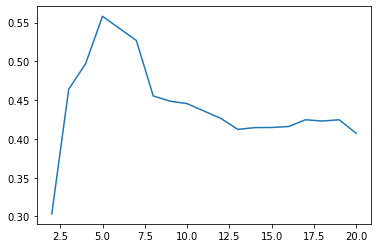

In [70]:
sns.lineplot(x=range(2,21),y=silscore)

In [72]:
new_clusters=KMeans(n_clusters=5,random_state=10)
new_clusters.fit(X)
df_cust['Cluster num']=new_clusters.labels_

In [73]:
df_cust.head(5)

,Yearly_Income,Age,Cust_Spend_Score,Sex,Cluster num
0,15000,18,44,0,1
1,15000,18,79,0,3
2,16000,23,8,1,1
3,16000,25,79,1,3
4,17000,32,41,1,1


C:\Users\skv\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


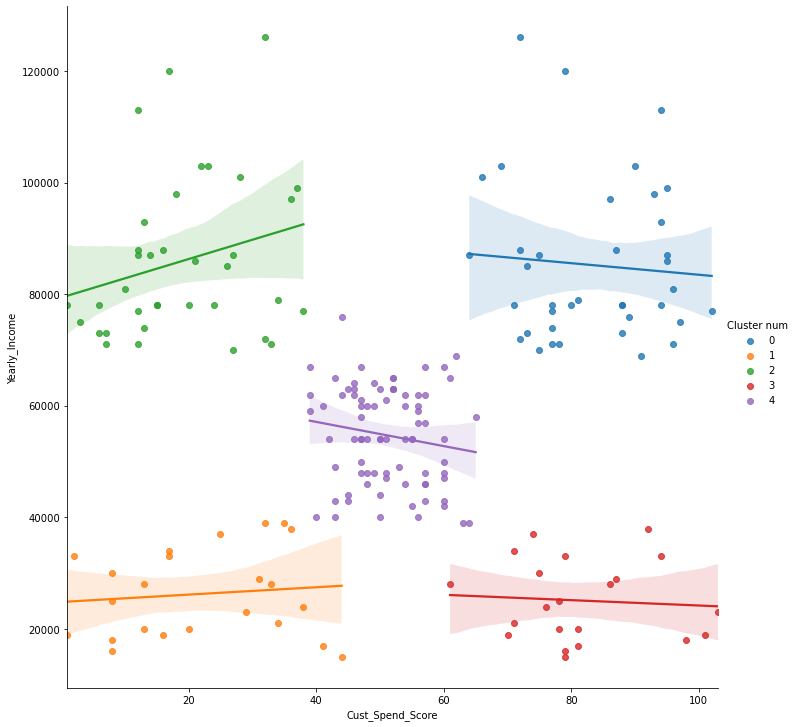

In [79]:
sns.lmplot(x = 'Cust_Spend_Score', y = 'Yearly_Income', data = df_cust, hue = 'Cluster num',  size = 10)